# Basic Optical Fiber Metrics

**Scott Prahl**

**Mar 2021**

---
*If* `` ofiber `` *is not installed, uncomment the following cell (i.e., delete the initial #) and execute it with* `` shift-enter ``.  *Afterwards, you may need to restart the kernel/runtime before the module will import successfully.*"

In [1]:
#!pip install --user ofiber

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

try:
    import ofiber

except ModuleNotFoundError:
    print('ofiber is not installed. To install, uncomment and run the cell above.')
    print('Once installation is successful, rerun this cell again.')

## The relative refractive index or $\Δ$

Compare result with an approximation.

In [3]:
n_clad= 1.48
n_core = 1.5
Δ_approx = (n_core-n_clad)/n_core
print("Δ = %.5f (approximation)"%Δ_approx)
Δ = ofiber.relative_refractive_index(n_core,n_clad)  #exact
print("Δ = %.5f"%Δ)

Δ = 0.01333 (approximation)
Δ = 0.01324


## Numerical Aperture of a step index fiber

A convenience method to find the numerical aperture given the core and cladding index.

In [4]:
help(ofiber.numerical_aperture)

Help on function numerical_aperture in module ofiber.basics:

numerical_aperture(n_core, n_clad)
    Calculate the numerical aperture of an optical fiber.
    
    Args:
        n_core : the index of refraction of the fiber core      [-]
        n_clad : the index of refraction of the fiber cladding  [-]
    
    Returns:
        numerical aperture                                      [-]



In [5]:
n_clad= 1.48
n_core = 1.5
Δ = (n_core-n_clad)/n_core

NA = n_core*np.sqrt(2*Δ)
print("NA    = %.4f (approximation)"%NA)
NA = ofiber.numerical_aperture(n_core,n_clad)
print("NA    = %.4f"%NA)

NA    = 0.2449 (approximation)
NA    = 0.2441


We can easily make plots.  Here is the variation of the exact numerical aperture and that obtained with the approximation to $\Δ$

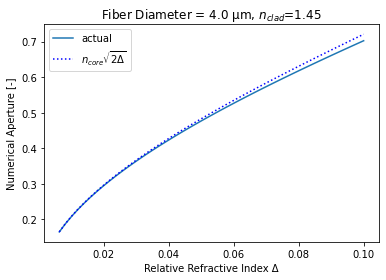

In [6]:
r_core=2e-6
n_clad= 1.45  # pure SiO2

Δ = np.linspace(0.0064,0.1,50)
n_core = n_clad/(1-Δ)

NA = ofiber.numerical_aperture(n_core,n_clad)

plt.plot(Δ,NA,label='actual')
plt.plot(Δ,n_core*np.sqrt(2*Δ),':b',label=r'$n_{core}\sqrt{2\Delta}$')
plt.xlabel(r'Relative Refractive Index Δ')
plt.ylabel('Numerical Aperture [-]')
plt.title(r'Fiber Diameter = %.1f µm, $n_{clad}$=%.2f'%(2*r_core*1e6,n_clad))

plt.legend()
plt.show()

## The V-parameter for a fiber

This helps characterize the number of modes in a fiber.  If $V\gg 2.4$ then the number of modes is 
$$
N \approx \frac{V^2}{2}
$$

In [7]:
help(ofiber.V_parameter)

Help on function V_parameter in module ofiber.basics:

V_parameter(a, NA, lambda0)
    Calculate the V-parameter for an optical fiber.
    
    Args:
        a :       radius of the fiber              [m]
        NA :      numerical aperture of the fiber  [-]
        lambda0 : wavelength in vacuum             [m]
    
    Returns:
        V-parameter                                [-]



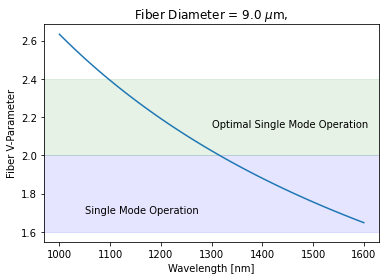

In [8]:
d=9e-6                                    # m
r_core = d/2
λ = np.linspace(1000,1600,100)*1e-9 # m

clad = ofiber.doped_glass(0)     # pure SiO2
n_clad = ofiber.n(clad,λ)

core = ofiber.doped_glass(0.02)  # 2% GeO2
n_core = ofiber.n(core,λ)

NA = ofiber.numerical_aperture(n_core,n_clad)
V = ofiber.V_parameter(r_core,NA,λ)

plt.plot(λ*1e9,V)
plt.axhspan(1.6,2.0,color='blue',alpha=0.1)
plt.axhspan(2.0,2.4,color='green',alpha=0.1)

plt.ylabel(r'Fiber V-Parameter')
plt.xlabel('Wavelength [nm]')
plt.title(r'Fiber Diameter = %.1f $\mu$m,'%(d*1e6))
plt.text(1300, 2.15, "Optimal Single Mode Operation")
plt.text(1050, 1.7, "Single Mode Operation")

plt.show()

## The cutoff wavelength for a fiber

In [9]:
help(ofiber.cutoff_wavelength)

Help on function cutoff_wavelength in module ofiber.basics:

cutoff_wavelength(a, NA, ell=0, q=inf)
    Calculate the cutoff wavelength for an optical fiber.
    
    The default operation is for this function to calculate the cutoff
    wavelength for the fundamental mode of a step-index fiber.  The cutoff
    wavelength for higher order modes may be found by specifying a different
    value of ell.
    
    If the cutoff wavelength for a graded index fiber is desired, then specify
    a different value for q.
    
    Args:
        a :   radius of the fiber                               [m]
        NA :  numerical aperture of the fiber                   [-]
        ell : (optional) mode number                            [-]
        q :   (optional) parameter for graded index fiber       [-]
    
    Returns:
        shortest wavelength for operation in the specified mode [m]



In [10]:
r_core = 2e-6    # m
Δ      = 0.0064
n_clad = 1.45
n_core = n_clad/(1-Δ)
NA     = n_core*np.sqrt(2*Δ)
lambdac=ofiber.cutoff_wavelength(r_core, NA)

print("Cutoff wavelength is %.0f nm"%(lambdac*1e9))

Cutoff wavelength is 863 nm


### Example page 21 in Powers

The effect of a graded index fiber on the cutoff wavelength.

In [11]:
d=8e-6      # m
r_core=d/2  # m
λ = 1300e-9 # m

n_core = 1.46
V = 2.1
NA = V/2/np.pi*λ/r_core

lambdac=ofiber.cutoff_wavelength(r_core, NA)
print("Cutoff wavelength is %.0f nm (step-index)"%(lambdac*1e9))

lambdac=ofiber.cutoff_wavelength(r_core, NA, q=2)
print("Cutoff wavelength is %.0f nm (parabolic fiber)"%(lambdac*1e9))

Cutoff wavelength is 1135 nm (step-index)
Cutoff wavelength is 803 nm (parabolic fiber)


Finally, how does the cutoff wavelength depend on the relative refractive index?

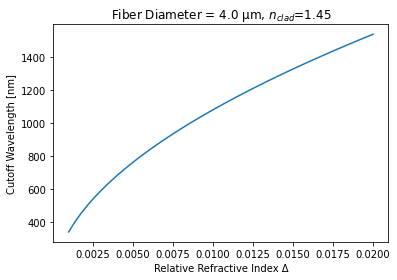

In [12]:
r_core=2e-6
n_clad= 1.45
Δ = np.linspace(0.001,0.02,50)

n_core = n_clad/(1-Δ)
NA = ofiber.numerical_aperture(n_core,n_clad)
lambdac = ofiber.cutoff_wavelength(r_core, NA)

plt.plot(Δ,lambdac*1e9)
plt.xlabel(r'Relative Refractive Index Δ')
plt.ylabel('Cutoff Wavelength [nm]')
plt.title(r'Fiber Diameter = %.1f µm, $n_{clad}$=%.2f'%(2*r_core*1e6, n_clad))
plt.show()